# One Hot Encoding
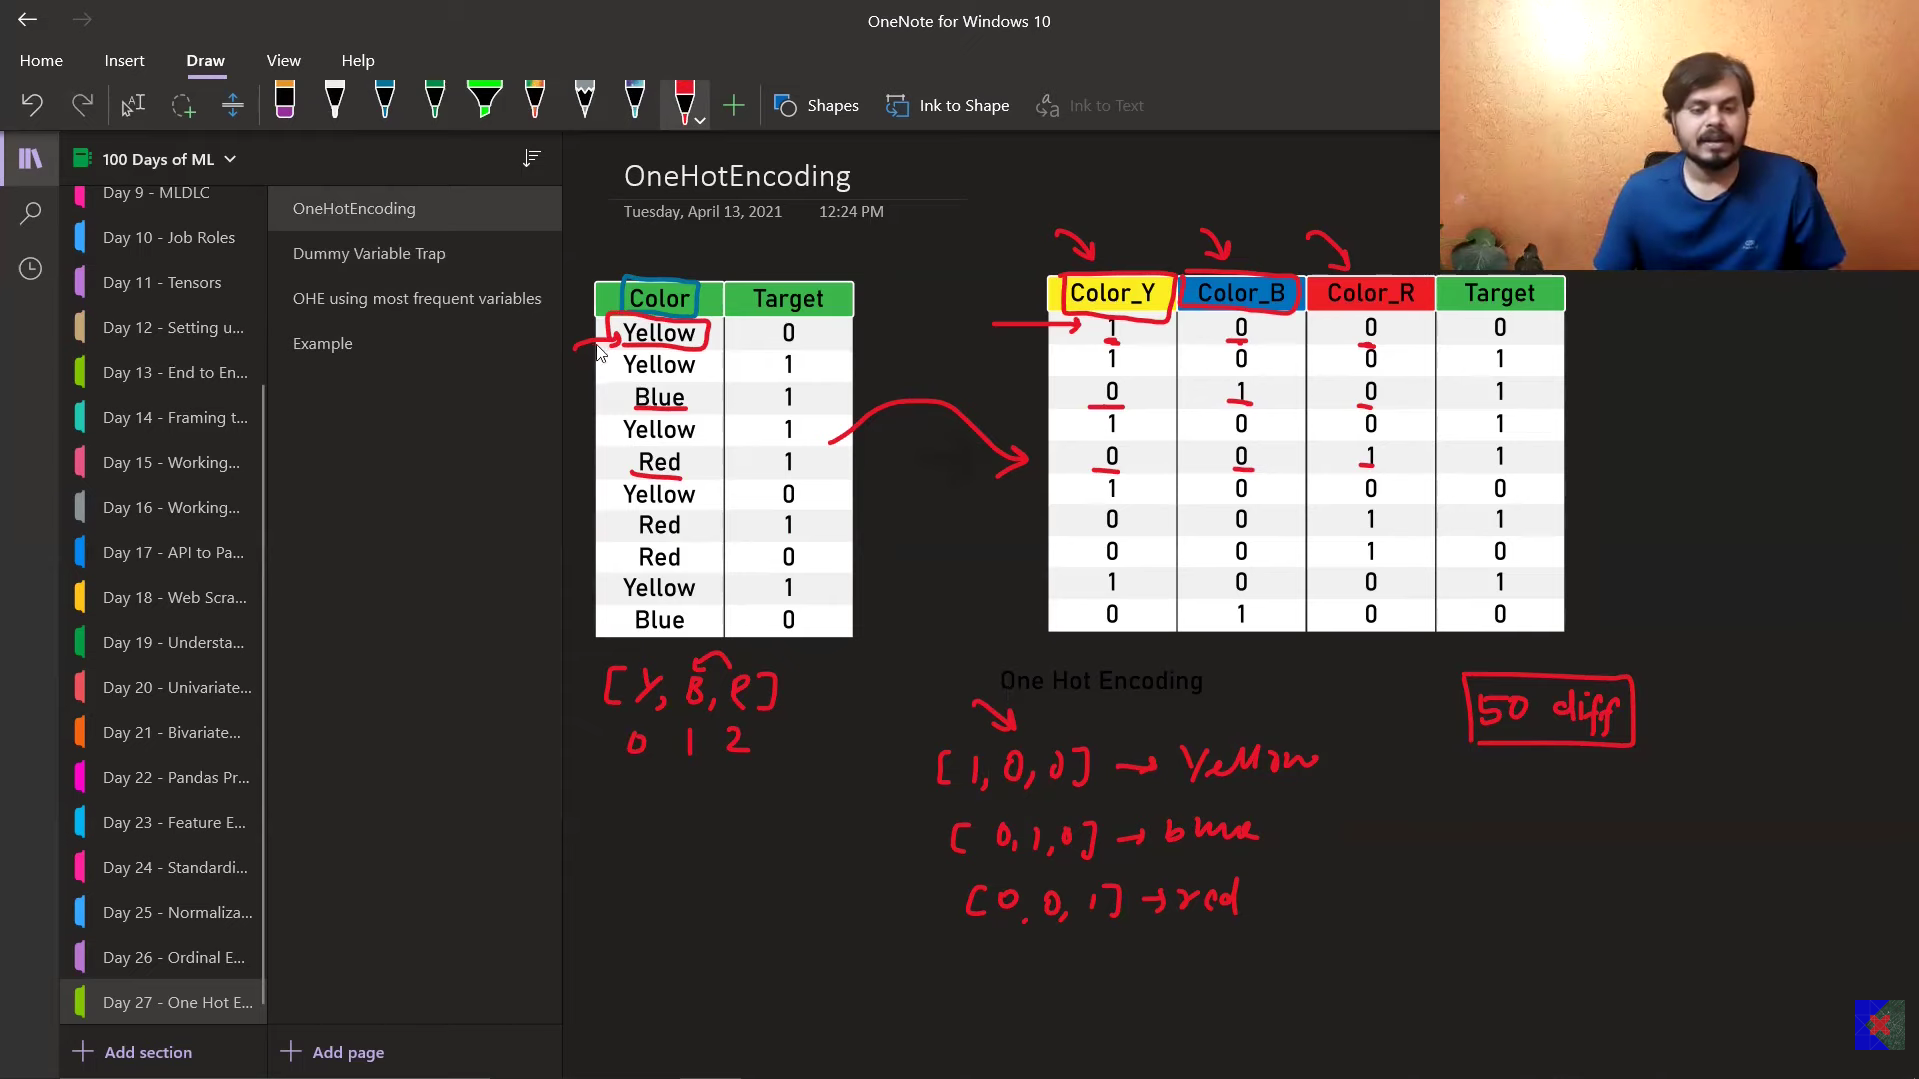

# Dummy Variable Trap
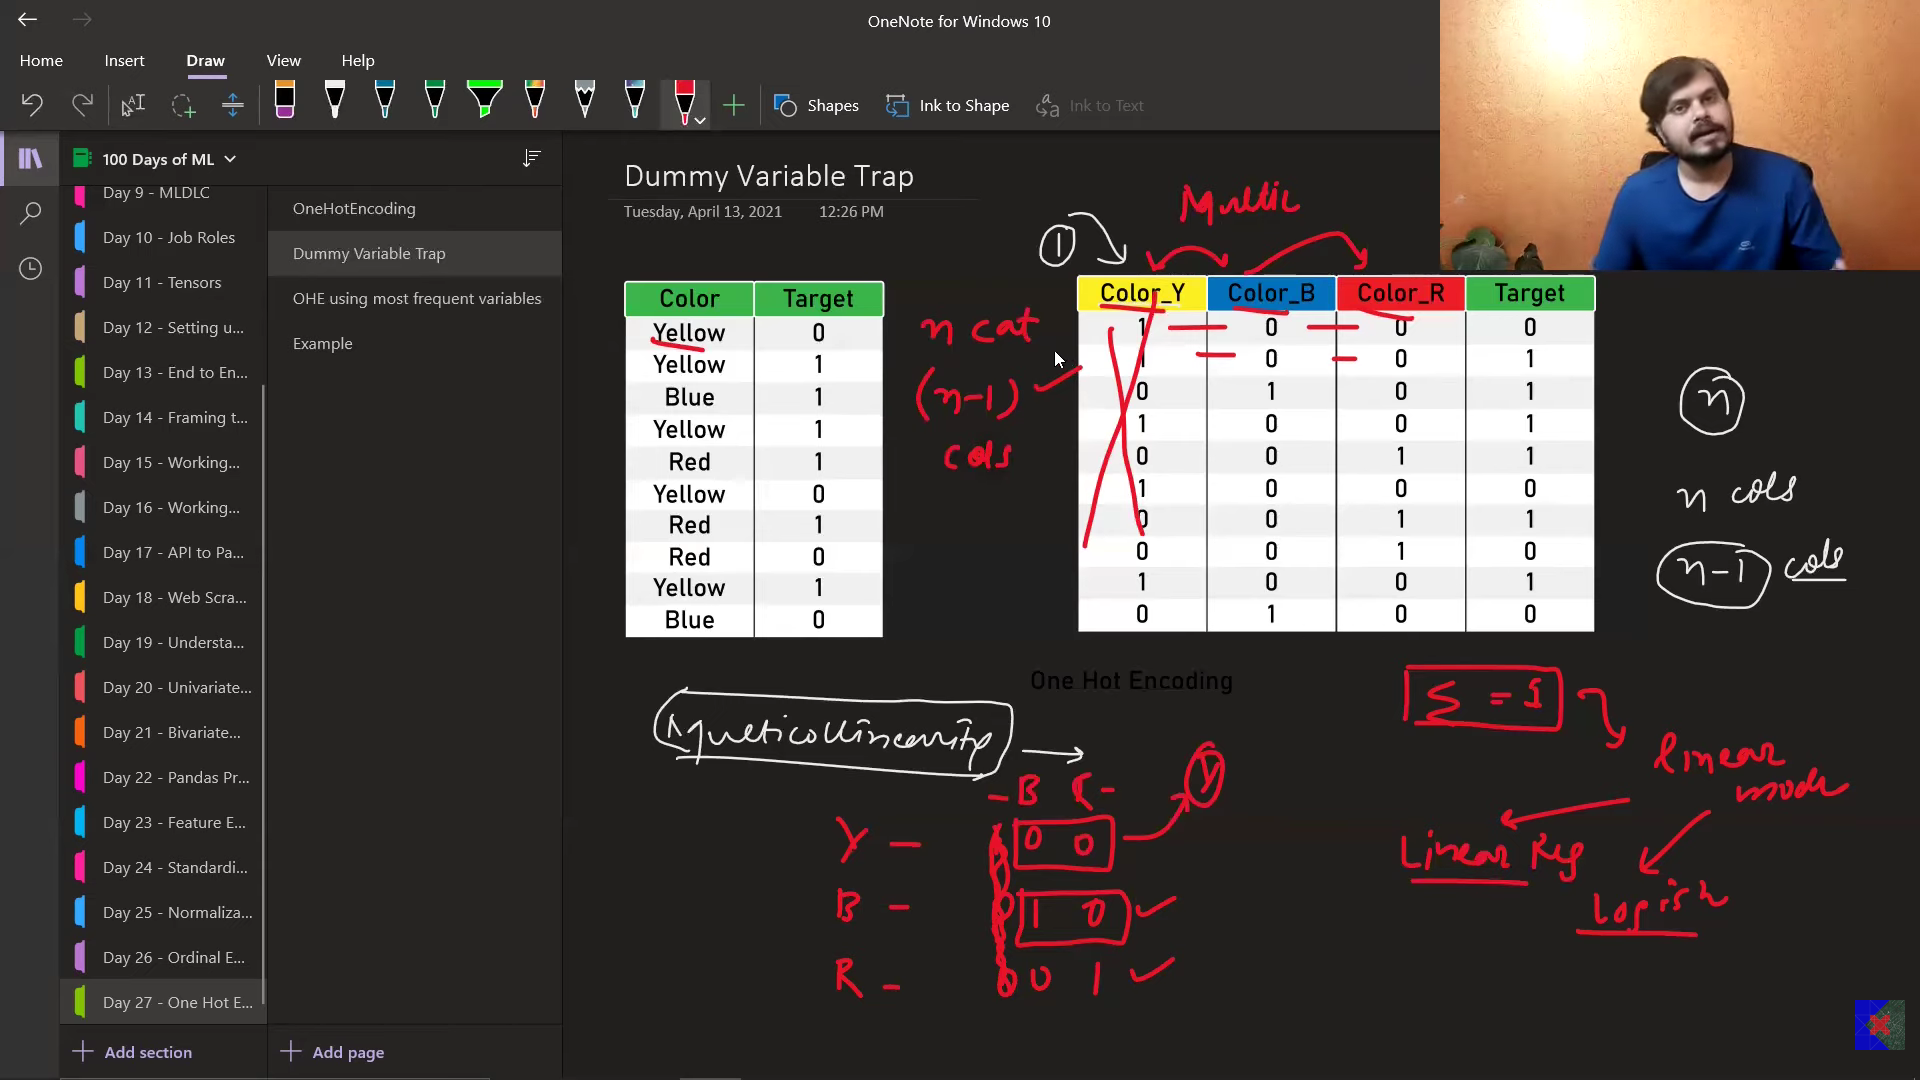
`remember the input variables shouldn't have dependency among them`

# OHE using most Frequent Variables

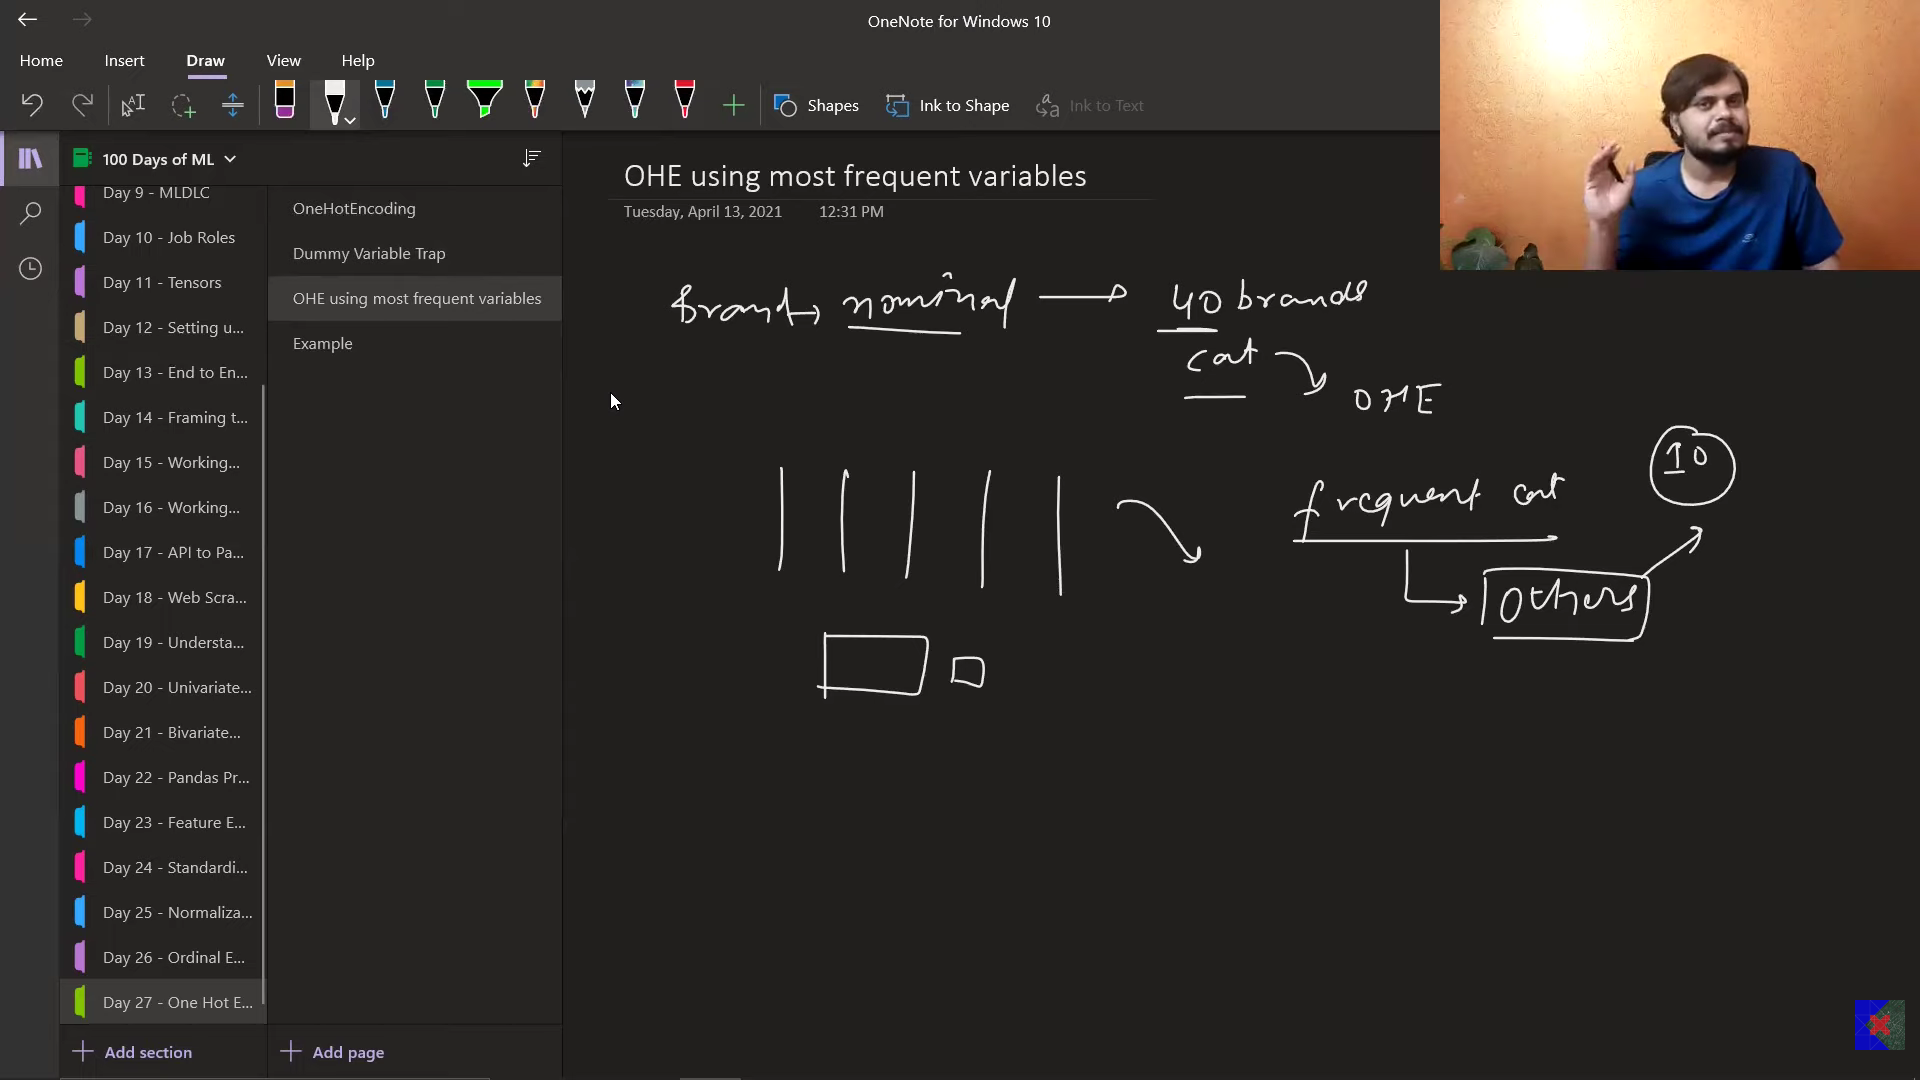

In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv('cars.csv')

In [49]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [50]:
cols = list(df.columns)[:-1]
cols.remove('km_driven')
for i in cols:
    print(df[i].value_counts())
    print(df[i].nunique())
    print()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64
32

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
4

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dt

In [51]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

## 1. OneHotEncoding using Pandas

In [52]:
pd.get_dummies(df, columns=['fuel', 'owner'], dtype=int)

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


## 2. K-1 OneHotEncoding

In [53]:
pd.get_dummies(df,columns=['fuel','owner'],dtype=int, drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


## 3. OneHotEncoding using Sklearn

In [54]:
# we prefer this more than pandas for ML training. for analysis, above is fine with pandas, but for training, SKLearn, because pandas don't remember the order of categorisation. it might generate randomly
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [55]:
X_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
ohe = OneHotEncoder(drop='first', sparse_output=True, dtype=np.int32)

In [90]:
type(ohe.fit_transform(X_train[['fuel', 'owner']]))

scipy.sparse._csr.csr_matrix

In [91]:
X_train_new = ohe.fit_transform(X_train[['fuel', 'owner']]).toarray()

In [ ]:
X_test_new = ohe.transform(X_train[['fuel', 'owner']]).toarray()

In [87]:
X_test_new.shape

(6502, 7)

In [83]:
np.hstack((X_train[['brand', 'km_driven']].values, X_train_new))

array([['Hyundai', 35000, 1.0, ..., 0.0, 0.0, 0.0],
       ['Jeep', 60000, 1.0, ..., 0.0, 0.0, 0.0],
       ['Hyundai', 25000, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Tata', 15000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 32500, 1.0, ..., 1.0, 0.0, 0.0],
       ['Isuzu', 121000, 1.0, ..., 0.0, 0.0, 0.0]], dtype=object)

## 4. OneHotEncoding with Top Categories

In [106]:
counts = df['brand'].value_counts()

In [107]:
df['brand'].nunique()
threshold = 100

In [108]:
repl = counts[counts <= threshold].index

In [125]:
brands = df['brand'].replace(repl, 'other')
brands = pd.DataFrame({'brand': brands})

In [136]:
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype = np.int32).set_output(transform="pandas")

In [138]:
ohe.fit_transform(brands)

,brand_Chevrolet,brand_Ford,brand_Honda,brand_Hyundai,brand_Mahindra,brand_Maruti,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_other
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,1,0,0,0


In [102]:
pd.get_dummies(df['brand'].replace(repl, 'other'), dtype=int).sample(100)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,other
638,0,0,0,0,1,0,0,0,0,0,0,0,0
6487,0,1,0,0,0,0,0,0,0,0,0,0,0
7313,0,0,0,0,0,0,0,0,0,1,0,0,0
3719,0,0,0,0,0,0,1,0,0,0,0,0,0
4862,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0,0,0,0,0,0,1,0,0,0,0,0,0
1561,0,0,0,0,0,0,0,0,0,0,0,0,1
3023,0,0,0,0,0,0,1,0,0,0,0,0,0
3200,0,0,0,0,0,0,1,0,0,0,0,0,0
